<a href="https://colab.research.google.com/github/gewasaad/Data-Science-Basics/blob/main/homework_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
df=pd.read_csv('/content/train_kaggle_housing.csv')

In [39]:
#Task 1: Data Preparation
#Divide the Dataset into Train and Test Sets
#●	Load the Kaggle Housing Prices dataset.
#●	Perform an initial assessment of the dataset to understand its structure and features.
#●	Split the dataset into training (70%) and testing (30%) sets using a random seed for reproducibility.
train, test=train_test_split(df, test_size=0.3, random_state=42)
train= train.copy()
test= test.copy()

In [56]:
#Task 2: Building a Basic Random Forest Model
#	Create a Random Forest Model with Numerical Features
#●	Identify and isolate the numerical features from the dataset.
#●	Remove any rows with null values in these numerical columns to ensure data integrity.
#●	Train a Random Forest model on the training set using only these non-null numerical features.
#●	Evaluate the model's performance on the test set using the MSE metrics
numeric_cols_df = df.select_dtypes(include=[np.number]).drop('SalePrice', axis=1)
x=numeric_cols_df.columns
for x in numeric_cols_df:
    df[x].fillna(df[x].median(), inplace=True)
X = numeric_cols_df
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_model=RandomForestRegressor (n_estimators=100)
rf_model.fit(X_train,y_train)
rf_model.score(X_train,y_train)

0.9772523661504561

In [41]:
#Task 3: Building an Enhanced Random Forest Model
#	Data Preprocessing for Categorical Features
#●	Identify categorical features in the dataset.
#●	Convert these categorical features into dummy variables using one-hot encoding (e.g., pd.get_dummies).
#●	Ensure that dummy variable creation is consistent between train and test sets.#
	#Handling Null Values
#●	For both numerical and categorical data, fill in missing values.
#●	Choose an appropriate strategy for filling nulls (e.g., mean or median for numerical, mode or a placeholder for categorical).
#	Training the Full Model
#●	Train a Random Forest model on the training set, this time using both the numerical and encoded categorical features.
#●	Again, assess the model's performance on the test set.
#	Feature Importance Analysis
#●	Calculate and analyze feature importance from the Random Forest model.
#●	Decide on the top X features to use for a more streamlined model. Consider different thresholds like top 30, 100, and 200 features based on their importance.
#	Model Accuracy Check
#●	Re-evaluate the model's accuracy with the selected top features.
#●	Compare the accuracy with the initial full-model to understand the impact of feature selection.


In [55]:
categorical_cols_df = df.select_dtypes(include=['object', 'category', 'bool'])
for x in categorical_cols_df:
    df[x].fillna('most_frequent', inplace=True)
cat_df=pd.get_dummies(categorical_cols_df, drop_first=False)
X = cat_df
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_model=RandomForestRegressor (n_estimators=100)
rf_model.fit(X_train,y_train)
rf_model.score(X_train,y_train)

0.9602712290598219

          Feature  Importance
4     OverallQual    0.547672
16      GrLivArea    0.123579
14       2ndFlrSF    0.039650
12    TotalBsmtSF    0.034996
9      BsmtFinSF1    0.032395
13       1stFlrSF    0.027807
26     GarageCars    0.024812
3         LotArea    0.019088
27     GarageArea    0.017503
6       YearBuilt    0.016358
7    YearRemodAdd    0.012182
23   TotRmsAbvGrd    0.010959
2     LotFrontage    0.010249
29    OpenPorchSF    0.008968
25    GarageYrBlt    0.007719
32    ScreenPorch    0.006887
28     WoodDeckSF    0.006695
11      BsmtUnfSF    0.006650
0              Id    0.005669
5     OverallCond    0.005557
8      MasVnrArea    0.005342
24     Fireplaces    0.004747
1      MSSubClass    0.004729
35         MoSold    0.004233
19       FullBath    0.003132
21   BedroomAbvGr    0.002473
36         YrSold    0.002122
33       PoolArea    0.001720
22   KitchenAbvGr    0.001416
17   BsmtFullBath    0.001407
10     BsmtFinSF2    0.000909
20       HalfBath    0.000817
30  Enclos

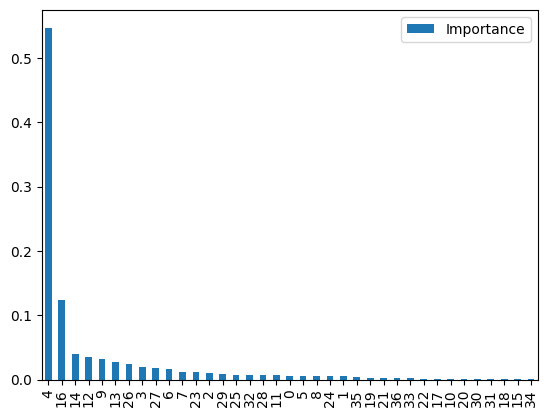

In [88]:
new_df=pd.concat([numeric_cols_df,cat_df], axis=1)
feature_importances = rf_model.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
print(feature_importances_df)
feature_importances_df.plot.bar()
plt.xlabel='Feature'
plt.ylabel='Importance'